##Installing the Libraries

In [156]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio
#!pip3 install SpeechRecognition pydub

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
libportaudiocpp0 is already the newest version (19.6.0-1).
portaudio19-dev is already the newest version (19.6.0-1).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


##Importing

In [157]:
from IPython.display import Audio
import librosa
import librosa.display
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


from pydub import AudioSegment
from pydub.silence import split_on_silence


from glob import glob

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import string

import pyaudio
import IPython.display as ipd
from itertools import cycle



import matplotlib as mpl
from cycler import cycler
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#!pip wheel --wheel-dir=/tmp/wheelhouse SomePackage
#!pip install --no-index --find-links=/tmp/wheelhouse SomePackage
#!pip wheel --no-binary SomePackage SomePackage
#!pip install ipd


#Mounting the Drive

In [158]:
from google.colab import drive

In [159]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [160]:
os.chdir('/content/drive/MyDrive/Python Final Project/Try Aud/ACT 1,2')

In [161]:
!ls

03-02-01-01-01-01-01.wav  03-02-03-01-02-02-01.wav  03-02-05-01-02-01-01.wav
03-02-01-01-01-01-02.wav  03-02-03-01-02-02-02.wav  03-02-05-01-02-01-02.wav
03-02-01-01-01-02-01.wav  03-02-03-02-01-01-01.wav  03-02-05-01-02-02-01.wav
03-02-01-01-01-02-02.wav  03-02-03-02-01-01-02.wav  03-02-05-01-02-02-02.wav
03-02-01-01-02-01-01.wav  03-02-03-02-01-02-01.wav  03-02-05-02-01-01-01.wav
03-02-01-01-02-01-02.wav  03-02-03-02-01-02-02.wav  03-02-05-02-01-01-02.wav
03-02-01-01-02-02-01.wav  03-02-03-02-02-01-01.wav  03-02-05-02-01-02-01.wav
03-02-01-01-02-02-02.wav  03-02-03-02-02-01-02.wav  03-02-05-02-01-02-02.wav
03-02-02-01-01-01-01.wav  03-02-03-02-02-02-01.wav  03-02-05-02-02-01-01.wav
03-02-02-01-01-01-02.wav  03-02-03-02-02-02-02.wav  03-02-05-02-02-01-02.wav
03-02-02-01-01-02-01.wav  03-02-04-01-01-01-01.wav  03-02-05-02-02-02-01.wav
03-02-02-01-01-02-02.wav  03-02-04-01-01-01-02.wav  03-02-05-02-02-02-02.wav
03-02-02-01-02-01-01.wav  03-02-04-01-01-02-01.wav  03-02-06-01-01-01-01.wav

##Inputing the Audio file

In [162]:
audioimp = glob('/content/drive/MyDrive/Python Final Project/Try Aud/*/*.wav')

In [163]:
ipd.Audio(audioimp[0])

In [164]:
ipd.Audio(audioimp[1])

Audio Recognition using Speech Recognization

In [165]:
!pip install speechrecognition
import speech_recognition as sr
r = sr.Recognizer()

Librosa for Loading Audio and plotting

In [166]:
y, sr = librosa.load(audioimp[0])
x, sr = librosa.load(audioimp[1])

In [167]:
print(f'y{y[:50]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y[ 5.1198731e-07  7.2901917e-06  3.6977508e-05  2.3442282e-05
  3.8662779e-06  2.3380138e-05  6.5979325e-06  3.3156059e-05
  1.1059176e-05  1.0247195e-05  4.8641839e-05  4.7104648e-05
  2.8029241e-05  2.8553590e-05  3.2570213e-05  3.5933834e-05
  5.0917501e-05  3.4524972e-05  2.7505797e-05  2.8213324e-05
  2.9080276e-05  4.9904971e-05  5.9524878e-05  7.3560419e-05
  6.1763021e-05  8.1669597e-05  5.4224121e-05  1.4870746e-05
  4.5033110e-05  2.3277918e-05  2.4699533e-05  3.1849151e-05
  3.0054951e-05  1.8454240e-05  2.6824311e-05  3.4979541e-05
  2.2686912e-05  2.5460198e-05  3.1737134e-05  5.3705530e-06
 -1.2318595e-06  1.5833417e-06 -2.4733306e-06  5.5863302e-06
  2.7624999e-05  4.8072441e-05  2.4702927e-05  2.3597722e-05
  9.5424020e-06  3.7962585e-05]
shape y: (104475,)
sr: 22050


In [168]:
print(f'x{x[:50]}')
print(f'shape x: {x.shape}')
print(f'sr: {sr}')

x[-4.99113355e-07  7.45043963e-07 -1.10163580e-06  1.68956399e-06
 -2.95176005e-06  8.80011703e-06  8.96742586e-06 -2.72099805e-06
  1.42571662e-06 -8.27961742e-07  4.68018868e-07 -2.23229165e-07
  4.77395545e-08  7.71442501e-08 -1.61142296e-07  2.08245666e-07
 -2.19380937e-07  1.92695182e-07 -1.24081993e-07  3.84875287e-09
  1.88042591e-07 -4.97707447e-07  1.05312438e-06 -2.37029940e-06
  1.09120992e-05  6.47847719e-06 -2.72980083e-06  1.74184663e-06
 -1.24811095e-06  9.31850423e-07 -7.02261445e-07  5.23626795e-07
 -3.79493798e-07  2.61288932e-07 -1.63635150e-07  8.43106491e-08
 -2.06028918e-08 -2.92804252e-08  6.69099407e-08 -9.37521705e-08
  1.11417485e-07 -1.20856257e-07  1.23653891e-07 -1.21103312e-07
  1.14425568e-07 -1.04746363e-07  9.30858164e-08 -8.03118638e-08
  6.72037643e-08 -5.43770788e-08]
shape x: (99325,)
sr: 22050


In [169]:
y

array([ 5.1198731e-07,  7.2901917e-06,  3.6977508e-05, ...,
       -1.5658690e-10,  1.0678146e-10,  0.0000000e+00], dtype=float32)

In [170]:
x

array([-4.9911336e-07,  7.4504396e-07, -1.1016358e-06, ...,
       -5.9236008e-06, -1.2711388e-05,  0.0000000e+00], dtype=float32)

In [171]:
pd.Series(y)

0         5.119873e-07
1         7.290192e-06
2         3.697751e-05
3         2.344228e-05
4         3.866278e-06
              ...     
104470   -2.931500e-10
104471    2.190828e-10
104472   -1.565869e-10
104473    1.067815e-10
104474    0.000000e+00
Length: 104475, dtype: float32

In [172]:
pd.Series(x)

0       -4.991134e-07
1        7.450440e-07
2       -1.101636e-06
3        1.689564e-06
4       -2.951760e-06
             ...     
99320   -8.912714e-06
99321   -7.977432e-06
99322   -5.923601e-06
99323   -1.271139e-05
99324    0.000000e+00
Length: 99325, dtype: float32

##Wave Plotting

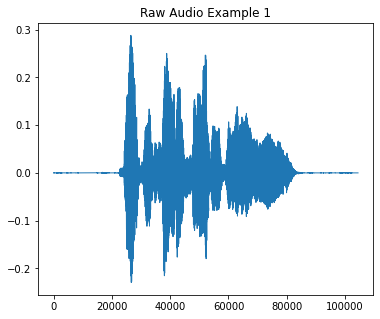

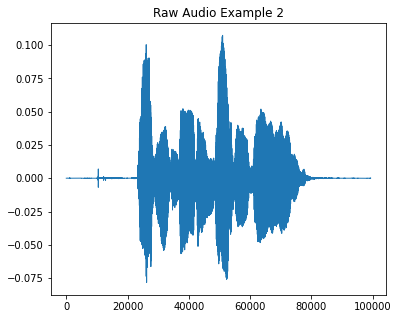

In [173]:
pd.Series(y).plot(figsize=(6, 5),
                  lw=1,
                  title='Raw Audio Example 1',)
plt.show()
pd.Series(x).plot(figsize=(6, 5),
                  lw=1,
                  title='Raw Audio Example 2',)
plt.show()

##Trimming the Audio wave

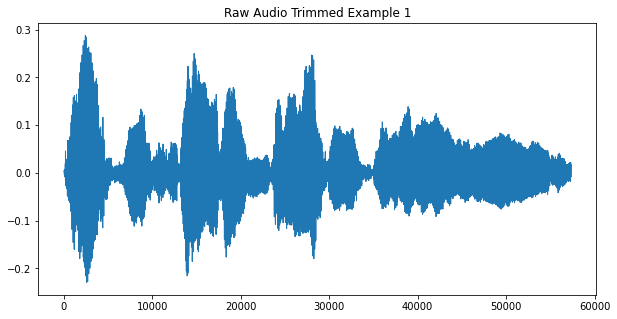

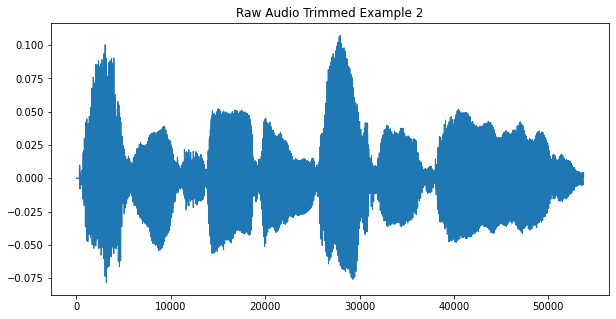

In [174]:
# Trimming the Wave
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example 1',
                 )
plt.show()
x_trimmed, _ = librosa.effects.trim(x, top_db=20)
pd.Series(x_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example 2',
                 )
plt.show()

##Zooming the wave based on wavelength

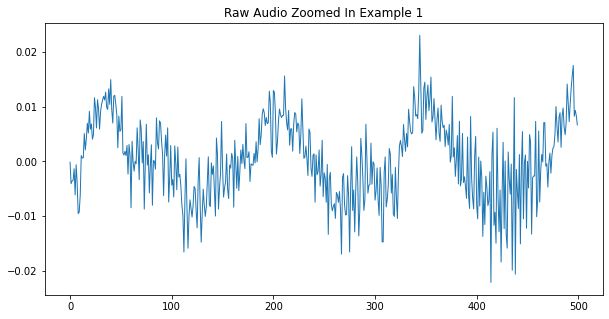

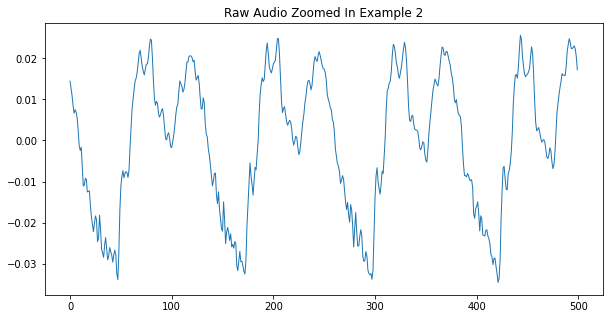

In [175]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example 1',
                 )
plt.show()
pd.Series(x[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example 2',
                 )
plt.show()


In [176]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 205)

In [177]:
T = librosa.stft(x)
t_db = librosa.amplitude_to_db(np.abs(T), ref=np.max)
t_db.shape

(1025, 194)

##Spectogram

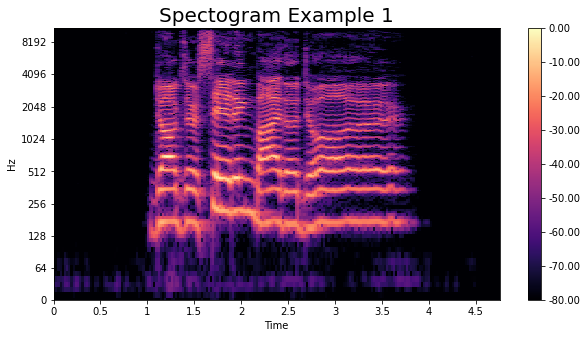

In [178]:
fig, ax = plt.subplots(figsize=(10, 5))
img1 = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example 1', fontsize=20)
fig.colorbar(img1, ax=ax, format=f'%0.2f')
plt.show()

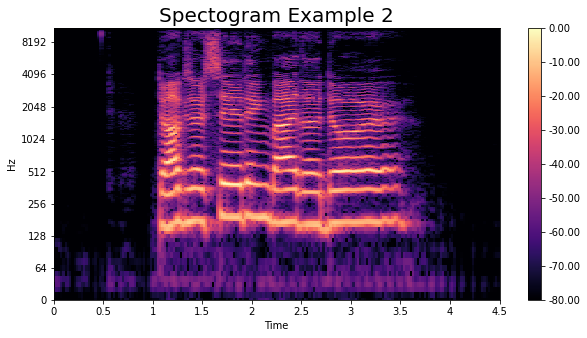

In [179]:
fig2, ax = plt.subplots(figsize=(10, 5))
img2 = librosa.display.specshow(t_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example 2', fontsize=20)
fig.colorbar(img2, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram #

In [180]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_fft=2048,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


In [181]:
# Mel Spectogram
mel_spect = librosa.feature.melspectrogram (y=y, sr=sr, n_fft=2048, hop_length=1024)

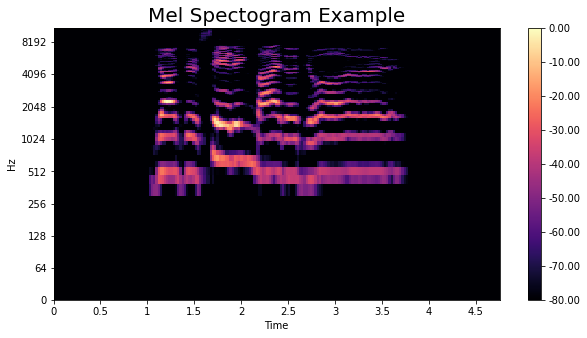

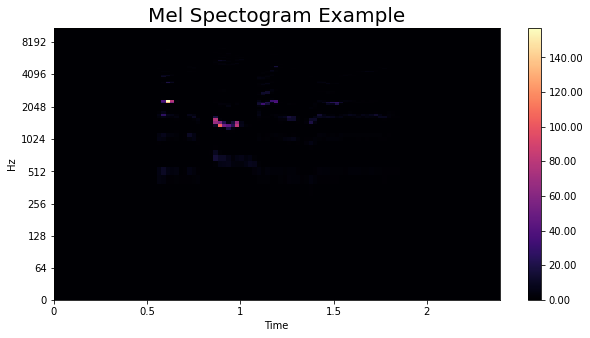

In [182]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img1 = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img1, ax=ax, format=f'%0.2f')
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the mel spectogram
img2 = librosa.display.specshow(mel_spect,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img2, ax=ax, format=f'%0.2f')
plt.show()

##Converting Audio to Text

In [183]:
pip install speechrecognition

In [185]:
import speech_recognition as sr

In [186]:
r = sr.Recognizer()

In [187]:
!ls

03-02-01-01-01-01-01.wav  03-02-03-01-02-02-01.wav  03-02-05-01-02-01-01.wav
03-02-01-01-01-01-02.wav  03-02-03-01-02-02-02.wav  03-02-05-01-02-01-02.wav
03-02-01-01-01-02-01.wav  03-02-03-02-01-01-01.wav  03-02-05-01-02-02-01.wav
03-02-01-01-01-02-02.wav  03-02-03-02-01-01-02.wav  03-02-05-01-02-02-02.wav
03-02-01-01-02-01-01.wav  03-02-03-02-01-02-01.wav  03-02-05-02-01-01-01.wav
03-02-01-01-02-01-02.wav  03-02-03-02-01-02-02.wav  03-02-05-02-01-01-02.wav
03-02-01-01-02-02-01.wav  03-02-03-02-02-01-01.wav  03-02-05-02-01-02-01.wav
03-02-01-01-02-02-02.wav  03-02-03-02-02-01-02.wav  03-02-05-02-01-02-02.wav
03-02-02-01-01-01-01.wav  03-02-03-02-02-02-01.wav  03-02-05-02-02-01-01.wav
03-02-02-01-01-01-02.wav  03-02-03-02-02-02-02.wav  03-02-05-02-02-01-02.wav
03-02-02-01-01-02-01.wav  03-02-04-01-01-01-01.wav  03-02-05-02-02-02-01.wav
03-02-02-01-01-02-02.wav  03-02-04-01-01-01-02.wav  03-02-05-02-02-02-02.wav
03-02-02-01-02-01-01.wav  03-02-04-01-01-02-01.wav  03-02-06-01-01-01-01.wav

*Speech to Text Conversion for audio1*



In [188]:
with sr.AudioFile('/content/drive/MyDrive/Python Final Project/Try Aud/ACT 1,2/SteveJobs2min.wav') as source:
   audio = r.listen(source)
   print(audio)
try:
     #r.adjust_for_ambient_noise(source, duration= 1)  # cleared the ambient noises and fetched the voice
     text = r.recognize_google(audio)
     print('Working on it...')
     print(text)
except:
     print('Unable to read the audio file')

Working on it...
I'm honored to be with you today for your commencement from one of the finest universities in the world truth be told I never graduated from college and this is the closest I've ever gotten to a college graduation today I want to tell you three stories from my life that's it no big deal just three stories the first story is about connecting the dots I dropped out of college after the first 6 months but then stayed around as a drop-in for another eighteen months or so before I really quit so wide I Dropout it started before I was born my biological mother was a young unwed graduate student and he decided to put me up for adoption she felt very strongly that I should be adopted by college graduates so everything was all set set for me to be adopted at Birth by a lawyer and his wife accept it when I popped out they decided at the last minute that they really want a girl so my parents who are on a waiting list got a call in the middle of the night asking we got an unexpect

In [124]:
#*Speech to Text Conversion for audio2 *#
'''with sr.AudioFile('/content/Motivate.wav') as source:
   audio = r.listen(source)
   print(audio)
try:
     #r.adjust_for_ambient_noise(source, duration= 1)  # cleared the ambient noises and fetched the voice
     txt = r.recognize_google(audio)
     print('Working on it...')
     print(txt)
except:
     print('Unable to read the audio file')'''

Working on it...
the biggest poison is Regret I think there are a lot of people that have dreams and aspirations of things that they always wanted to do but it wasn't the right time or didn't have enough money or they have enough experience it's never the right time you never going to have the right experience and all the sudden you wake up and you're 70 and you're like God I wish I could have done it it's what you don't do that screws with you later on I get one shot at this life and I don't want to go


In [191]:
text1 = re.findall('[A-Z][^A-Z]*', text) # spliting where a capital letter for text1
#txt1 = re.findall('[A-Z][^A-Z]*', txt) # spliting where a capital letter for txt1

In [192]:
text1

["I'm honored to be with you today for your commencement from one of the finest universities in the world truth be told ",
 'I never graduated from college and this is the closest ',
 "I've ever gotten to a college graduation today ",
 "I want to tell you three stories from my life that's it no big deal just three stories the first story is about connecting the dots ",
 'I dropped out of college after the first 6 months but then stayed around as a drop-in for another eighteen months or so before ',
 'I really quit so wide ',
 'I ',
 'Dropout it started before ',
 'I was born my biological mother was a young unwed graduate student and he decided to put me up for adoption she felt very strongly that ',
 'I should be adopted by college graduates so everything was all set set for me to be adopted at ',
 'Birth by a lawyer and his wife accept it when ',
 'I popped out they decided at the last minute that they really want a girl so my parents who are on a waiting list got a call in the middl

In [127]:
#txt1

['Regret ',
 "I think there are a lot of people that have dreams and aspirations of things that they always wanted to do but it wasn't the right time or didn't have enough money or they have enough experience it's never the right time you never going to have the right experience and all the sudden you wake up and you're 70 and you're like ",
 'God ',
 'I wish ',
 "I could have done it it's what you don't do that screws with you later on ",
 'I get one shot at this life and ',
 "I don't want to go"]

## Splitting Words from the text and clearing STOPWORDS

In [193]:
from random import shuffle

def scramble(sentence):
   split = text.split()  # Split the string into a list of words
   #shuffle(split)  # This shuffles the list in-place.
   #return ' '.join(split)  # Turn the list back into a string
   return split

print(scramble("this is a sentence"))

["I'm", 'honored', 'to', 'be', 'with', 'you', 'today', 'for', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'truth', 'be', 'told', 'I', 'never', 'graduated', 'from', 'college', 'and', 'this', 'is', 'the', 'closest', "I've", 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', "that's", 'it', 'no', 'big', 'deal', 'just', 'three', 'stories', 'the', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'I', 'dropped', 'out', 'of', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', 'eighteen', 'months', 'or', 'so', 'before', 'I', 'really', 'quit', 'so', 'wide', 'I', 'Dropout', 'it', 'started', 'before', 'I', 'was', 'born', 'my', 'biological', 'mother', 'was', 'a', 'young', 'unwed', 'graduate', 'student', 'and', 'he', 'decided', 'to', 'put', 'me', 'up', 'for', 'adoption',

In [194]:
converting_To_Words = word_tokenize(text)

In [195]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [196]:
stop_words = list(stopwords.words('english'))

In [197]:
words_without_stopwords = [w for w in converting_To_Words if w not in stop_words]

In [198]:
wordDataFrame = pd.DataFrame(words_without_stopwords)

In [199]:
wordDataFrame['Words'] = words_without_stopwords
wordDataFrame

,0,Words
0,I,I
1,'m,'m
2,honored,honored
3,today,today
4,commencement,commencement
...,...,...
138,go,go
139,college,college
140,I,I
141,know,know


In [200]:
print("Total number of words in this book - ",len(words_without_stopwords))

Total number of words in this book -  143


In [ ]:
count_dict = Counter(words_without_stopwords)
count_dict


In [202]:
bow_df = pd.DataFrame(count_dict.items()).rename(columns={0:'word',1:'count'})
df1 = bow_df.where(bow_df['count'] >= 1)
df1

,word,count
0,I,13
1,'m,1
2,honored,1
3,today,2
4,commencement,1
...,...,...
94,start,1
95,17,1
96,years,1
97,know,1


## Generating a Word Cloud##

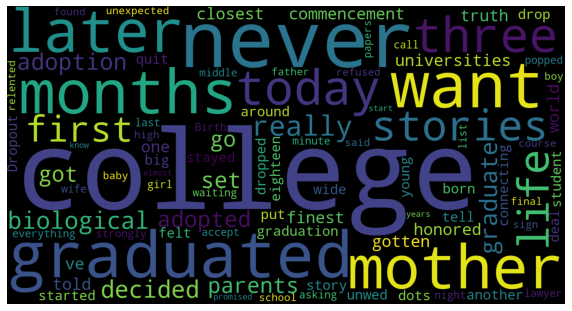

In [203]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(words_without_stopwords)
wordcloud = WordCloud(width = 1500, height = 800).generate(unique_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("speech"+".png", bbox_inches='tight')
plt.show()
plt.close()